# ein Python programm zur Analyse eine .har datei


Es soll eine Webseite analyiert werden, in der eine har datei geprüft wird

In [1]:
import json
from haralyzer import HarParser
import pandas as pd
import matplotlib.pyplot as plt

# Laden der HAR-Datei
with open('example.har', 'r') as f:
    har_data = json.load(f)

# Initialisieren des HarParser
har_parser = HarParser(har_data)

# Erstellen einer Liste für die Daten und URLs
data = []
urls = []

In [2]:
# Durchlaufen aller Seiten in der HAR-Datei
for page in har_parser.pages:
    for entry in page.entries:
        url = entry['request']['url']
        domain = url.split('/')[2]
        bytes_transferred = entry['response']['bodySize']
        
        # Hinzufügen der Daten zur Liste
        data.append({'domain': domain, 'bytes': bytes_transferred})
        # Hinzufügen der URL zur Liste
        urls.append(url)




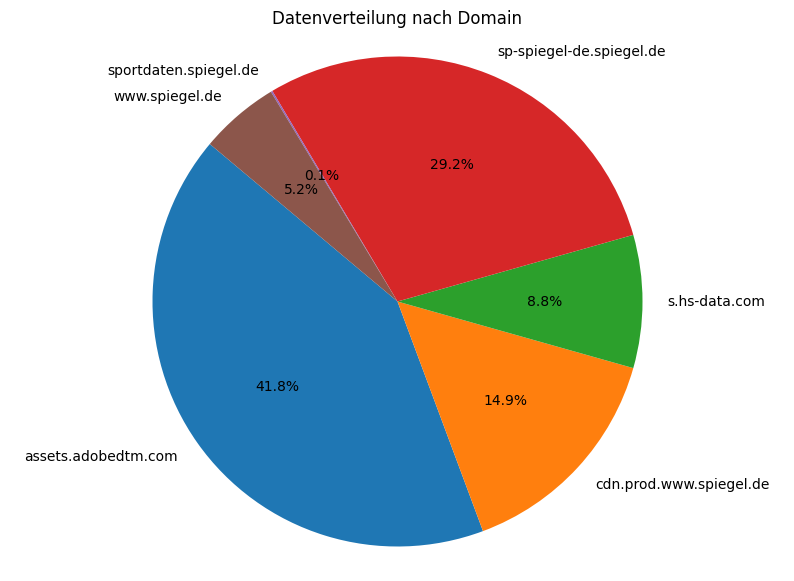

HAR-Datei und URL-Liste wurden erfolgreich erstellt.


In [3]:

# Erstellen eines DataFrames aus der Liste
df = pd.DataFrame(data)

# Gruppieren nach Domain und Summieren der übertragenen Bytes
domain_data = df.groupby('domain').sum().reset_index()

# Erstellen des Kuchendiagramms
plt.figure(figsize=(10, 7))
plt.pie(domain_data['bytes'], labels=domain_data['domain'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Gleichmäßiges Kreisdiagramm
plt.title('Datenverteilung nach Domain')
plt.show()

print("HAR-Datei und URL-Liste wurden erfolgreich erstellt.")

In [4]:
print (urls)
for url in urls:
    print (url)
# Speichern der URLs in einer Datei
#with open('urls.txt', 'w') as f:
#    for url in urls:
#        f.write(url + '\n')

['https://www.spiegel.de/', 'https://cdn.prod.www.spiegel.de/public/spon/generated/css/styles.38a3220ef06e7407fb0d.css', 'https://cdn.prod.www.spiegel.de/public/shared/generated/js/commons.6346f0fd0c092b628b12.js', 'https://cdn.prod.www.spiegel.de/public/shared/generated/js/header.3aca8678f7ec87a7e43a.js', 'https://cdn.prod.www.spiegel.de/public/shared/generated/js/vendors.298adb1b0c634b40269b.js', 'https://cdn.prod.www.spiegel.de/public/shared/generated/js/index.797db2d2005f108dbec9.js', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Bold.woff2', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4UI-Regular.woff2', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSlab4UICd-ExtraBold.woff2', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSans4-6SemiBold.woff2', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Regular.woff2', 'https://cdn.prod.www.spiegel.de/public/shared/fonts/SpiegelSerifTextUI-Italic.wo